In [1]:
import pandas as pd
import numpy as np
#Visiualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


This is bank data and we need to check which customer will stay and which will go 

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

if null value is absent then it show 0. 
from this we conclude that we do not have any null value

In [4]:
df.describe()
#it gives us some of stats term needed to analyze some feature

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.info()# we have all together 17 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
#this gives the unique value of that particular feature
print('Age: \n',df.age.unique())
print('Job: \n',df.job.unique())
print('marital: \n',df.marital.unique())
print('education: \n',df.education.unique())
print('housing: \n',df.housing.unique())
print('loan: \n',df.loan.unique())
print('Contact: \n',df.contact.unique())
print('month: \n',df.month.unique())
print('Day: \n',df.day_of_week.unique())
print('campaign: \n',df.campaign.unique())
print('pdays: \n',df.pdays.unique())
print('poutcome: \n',df.poutcome.unique())
print('y: \n',df.y.unique())

Age: 
 [44 53 28 39 55 30 37 36 27 34 41 33 26 52 35 40 32 49 38 47 46 29 54 42
 72 48 43 56 31 24 68 59 50 45 25 57 63 58 60 64 51 23 20 74 80 61 62 75
 21 82 77 70 76 73 66 22 71 19 79 88 65 67 81 18 84 69 98 85 83 78 92 86
 94 17 91 89 87 95]
Job: 
 ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital: 
 ['married' 'single' 'divorced' 'unknown']
education: 
 ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
housing: 
 ['yes' 'no' 'unknown']
loan: 
 ['no' 'yes' 'unknown']
Contact: 
 ['cellular' 'telephone']
month: 
 ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
Day: 
 ['thu' 'fri' 'tue' 'mon' 'wed']
campaign: 
 [ 1  3  2  8  5  4 25 11 12 18  6 17  7 20 16 14 10  9 19 29 13 40 15 34
 22 24 41 21 23 39 28 27 31 35 26 30 32 43 33 42 56 37]
pdays: 
 [999   6   3   2   4  16   0   5  11  14  13   9  15  1

So basicallt marital, housing , loan, y and poutcome are categorical data

In [7]:
#Count values of categorical data
print('Marital: \n',df.marital.value_counts())
print('---------------------------------------------------')
print('Education: \n',df.education.value_counts())
print('---------------------------------------------------')
print('Default: \n',df.default.value_counts())
print('---------------------------------------------------')
print('Housing: \n',df.housing.value_counts())
print('---------------------------------------------------')
print('Loan: \n',df.loan.value_counts())
print('---------------------------------------------------')
print('Contract: \n',df.contact.value_counts())
print('---------------------------------------------------')
print('poutcome: \n',df.poutcome.value_counts())
print('---------------------------------------------------')
print('y: \n',df.y.value_counts)

Marital: 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
---------------------------------------------------
Education: 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
---------------------------------------------------
Default: 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
---------------------------------------------------
Housing: 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
---------------------------------------------------
Loan: 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
---------------------------------------------------
Contract: 
 cellular     26144
telephone    15044
Name: contact, dtype: int64
------------

<Axes: xlabel='y', ylabel='count'>

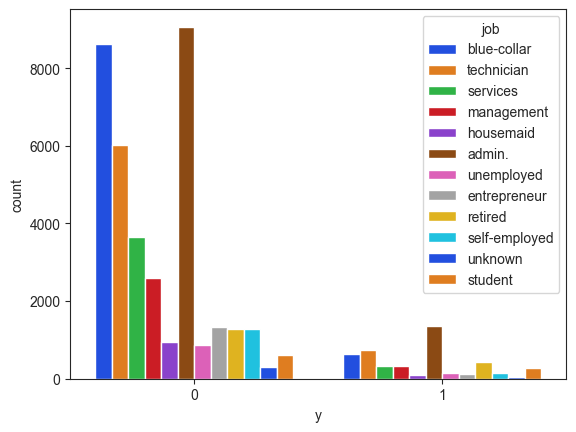

In [8]:
sns.set_style('ticks')
sns.countplot(x = 'y', hue = 'job',data=df,palette='bright')

since job have many sub category we make studying them easy by using countplot we can see that the customer whihc wont be get churn that is admin and bluecollar

<Axes: xlabel='y', ylabel='count'>

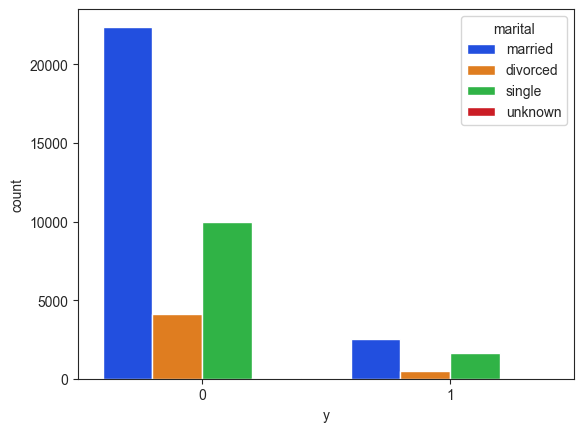

In [9]:
sns.set_style('ticks')
sns.countplot(x = 'y', hue = 'marital',data=df,palette='bright')

0 = non existence and 1 = sucess

we using same to visualize marital

<Axes: xlabel='age', ylabel='Count'>

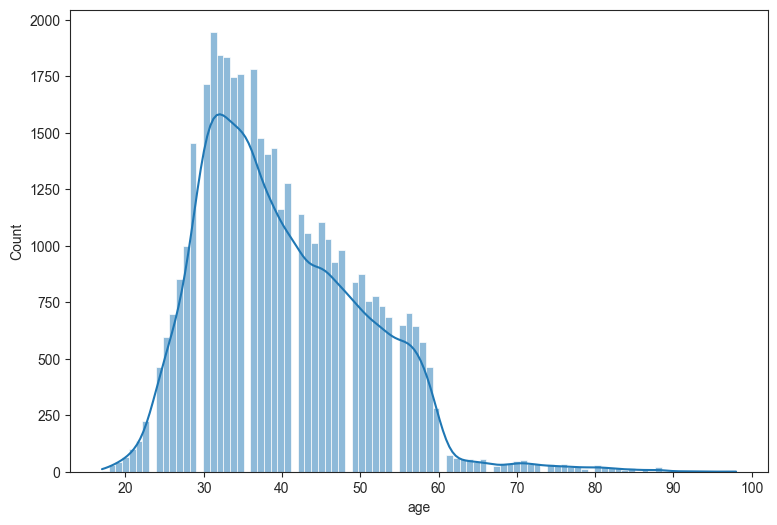

In [10]:
plt.figure(figsize=(9,6))
sns.histplot(df, x='age',kde=True) # Plot the density curve too
#df['age'].hist(bins=30)

Histograms allow us to plot the distributions of numeric variables ,so we using it for age

We can see it is right skewed and its mean > median

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

<Axes: xlabel='day_of_week', ylabel='Count'>

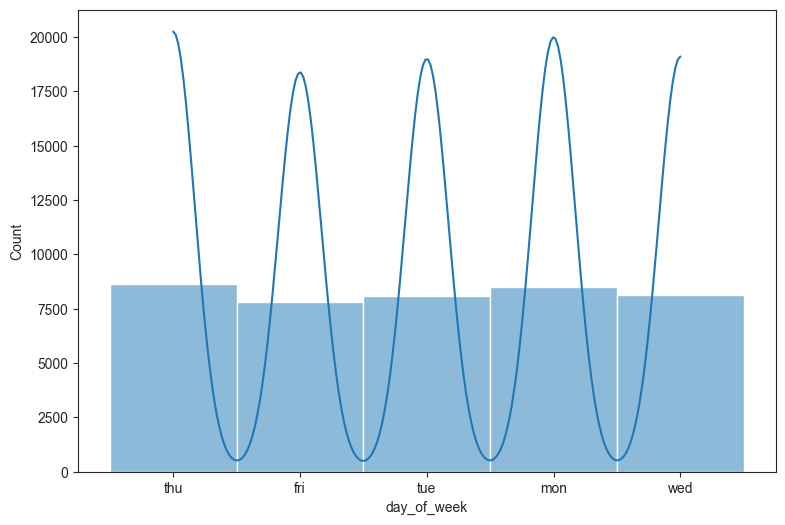

In [12]:
plt.figure(figsize=(9,6))
sns.histplot(df, x='day_of_week',kde=True) # Plot the density curve too
#df['day'].hist(bins=60)

<Axes: >

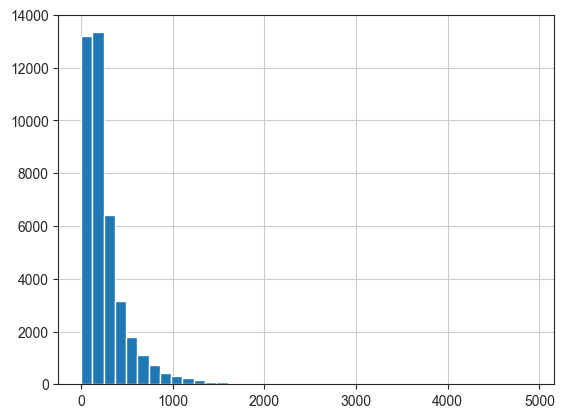

In [13]:
df['duration'].hist(bins=40)

<Axes: >

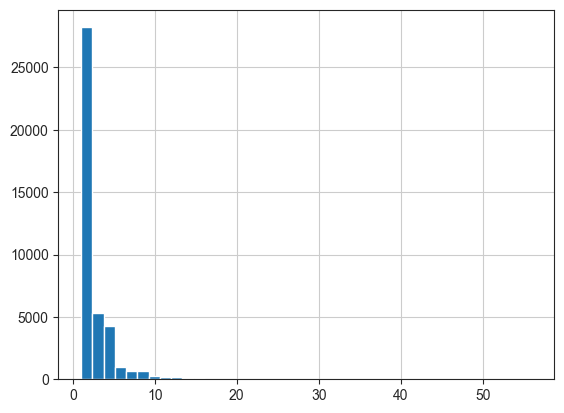

In [14]:
df['campaign'].hist(bins=40)

<Axes: >

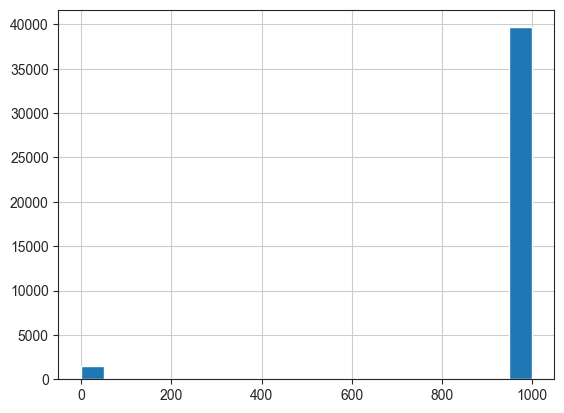

In [15]:
df['pdays'].hist(bins=20)

<Axes: xlabel='job', ylabel='count'>

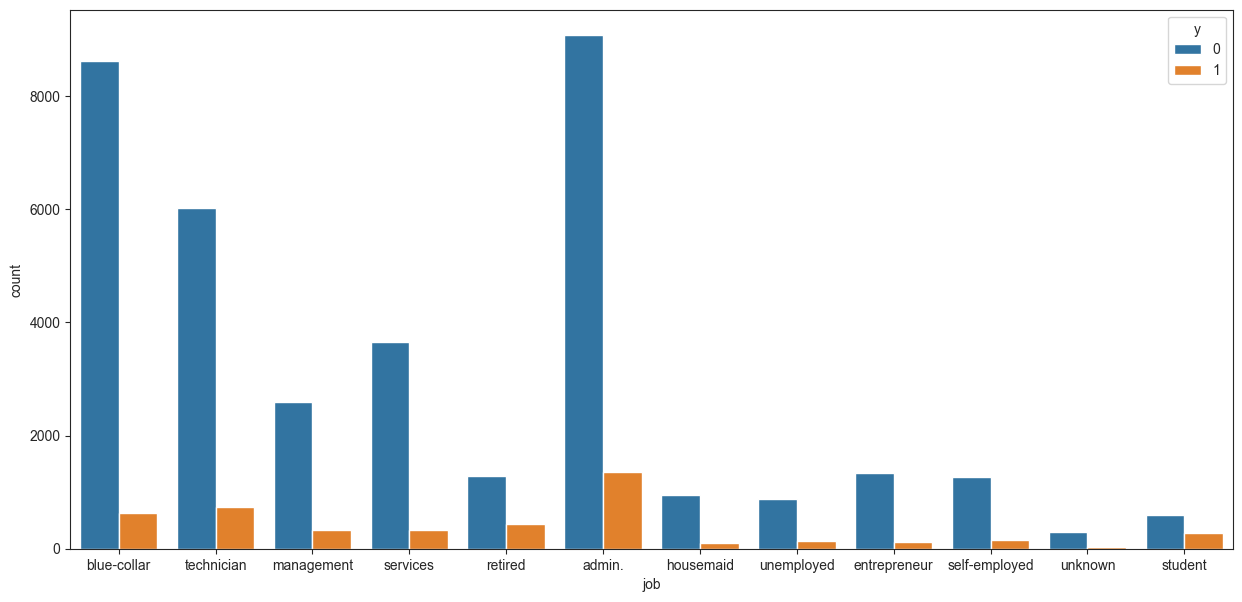

In [16]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='job',data=df, hue='y')

<Axes: xlabel='marital', ylabel='count'>

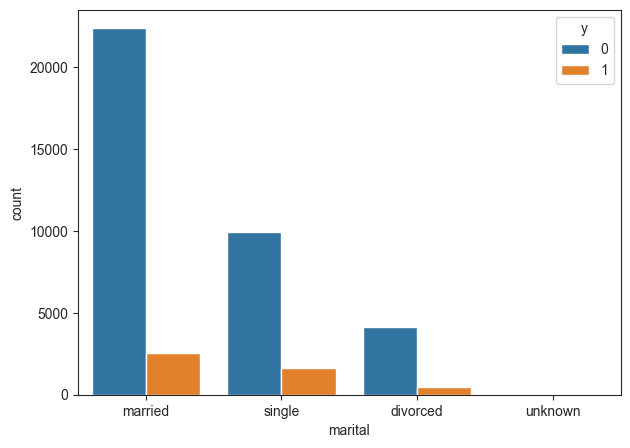

In [17]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x='marital',data=df, hue='y')

<Axes: xlabel='education', ylabel='count'>

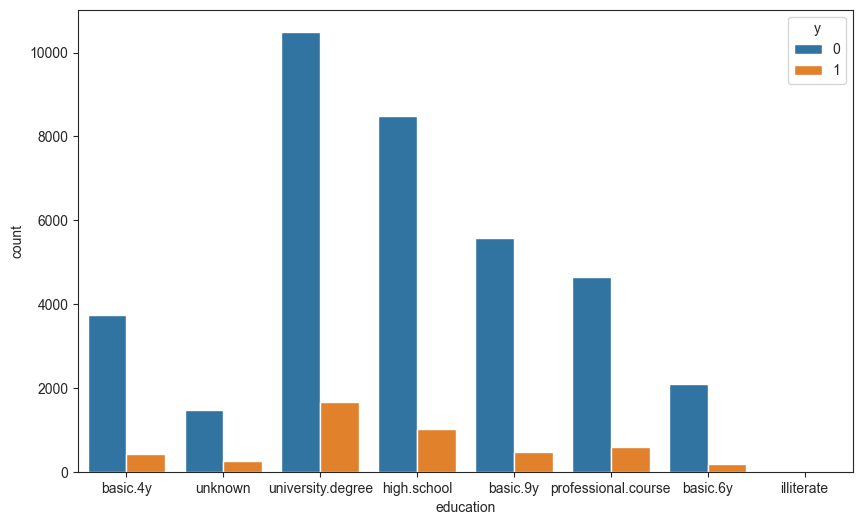

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df, hue='y')

<Axes: xlabel='loan', ylabel='count'>

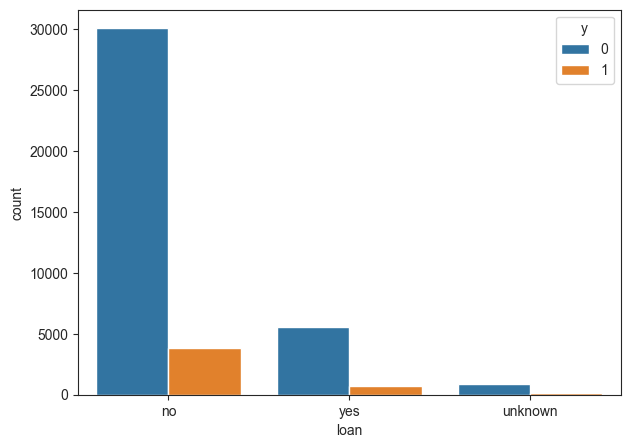

In [19]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x='loan',data=df, hue='y')

In [20]:
#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

Label Encoder and One Hot Encoder.used to convert categorical data, or text data, into numbers, which our predictive models can better understand.

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [22]:
X = df.drop('y', axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5


In [23]:
Y = df['y']

In [24]:
Y.unique()

array([0, 1], dtype=int64)

In [25]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [26]:
#transforming data
#this is education unique values
ed = ['basic.4y','university.degree','high.school','basic.9y','professional.course','basic.6y','illiterate','unknown']

In [27]:
df['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [28]:
day_of_week = ['thu','fri', 'tue', 'mon', 'wed']

In [29]:
#the first features that are transform by using StandardScalar this is standardization i.e mean =0 and std = 1 used in numeric value
#the second feature that is transform is education where we changed categorical to numeric using ordinalencoder
#onehotencoder is used derived the categories based on the unique values in each feature
transforming = ColumnTransformer(transformers=[('t1',StandardScaler(),['age','duration','campaign','pdays','previous']),
                                               ('t2',OrdinalEncoder(categories=[ed, day_of_week]),['education','day_of_week']),
                                               ('t3',OneHotEncoder(),['job','marital','default','housing','loan','contact','month','poutcome'])],
                                 remainder ='passthrough')
#remainder is use to fit unspecified columns in transformer

In [30]:
transforming

ColumnTransformer(remainder='passthrough',
                  transformers=[('t1', StandardScaler(),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous']),
                                ('t2',
                                 OrdinalEncoder(categories=[['basic.4y',
                                                             'university.degree',
                                                             'high.school',
                                                             'basic.9y',
                                                             'professional.course',
                                                             'basic.6y',
                                                             'illiterate',
                                                             'unknown'],
                                                            ['thu', 'fri',
                                                             'tue', 'mon',
                                                             'wed']]),
                                 ['education', 'day_of_week']),
                                ('t3', OneHotEncoder(),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'poutcome'])])

scale the data, this will being all our features to the same scale, this helps ensure attributes with larger values do not over influence the model. The StandardScaler in sklearn essentially computes the z score of each feature which ensures each feature in the dataset has a mean of 0 and variance of 1.

In [31]:
def transform(df):
  tranform_f = np.array(transforming.fit_transform(df),dtype=np.str)
  return tranform_f

In [32]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5


In [33]:
trans_X = np.array(transforming.fit_transform(X), dtype=np.str)
trans_X

C:\Users\arush\AppData\Local\Temp\ipykernel_8360\2800899354.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trans_X = np.array(transforming.fit_transform(X), dtype=np.str)


array([['0.38152696346039877', '-0.18623008427539628',
        '-0.5659219741930244', ..., '-36.1', '4.963', '5228.1'],
       ['1.2451574563070607', '-0.46392633023417645',
        '-0.5659219741930244', ..., '-42.0', '4.021', '5195.8'],
       ['-1.1538161349336669', '0.31130902306741826',
        '0.15610492148155003', ..., '-39.8', '0.729', '4991.6'],
       ...,
       ['0.1896090761611406', '-0.7570501454128888',
        '0.15610492148155003', ..., '-36.4', '4.857', '5191.0'],
       ['0.7653627380589152', '-0.22479900732522687',
        '-0.20490852635573717', ..., '-26.9', '0.742', '5017.5'],
       ['-1.4416929658825541', '-0.564205530163736',
        '0.5171183693188373', ..., '-36.4', '4.859', '5191.0']],
      dtype='<U32')

In [34]:
trans_X.shape

(41188, 52)

In [35]:
tran_X = np.array(trans_X,dtype=float)
tran_X

array([[ 3.81526963e-01, -1.86230084e-01, -5.65921974e-01, ...,
        -3.61000000e+01,  4.96300000e+00,  5.22810000e+03],
       [ 1.24515746e+00, -4.63926330e-01, -5.65921974e-01, ...,
        -4.20000000e+01,  4.02100000e+00,  5.19580000e+03],
       [-1.15381613e+00,  3.11309023e-01,  1.56104921e-01, ...,
        -3.98000000e+01,  7.29000000e-01,  4.99160000e+03],
       ...,
       [ 1.89609076e-01, -7.57050145e-01,  1.56104921e-01, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 7.65362738e-01, -2.24799007e-01, -2.04908526e-01, ...,
        -2.69000000e+01,  7.42000000e-01,  5.01750000e+03],
       [-1.44169297e+00, -5.64205530e-01,  5.17118369e-01, ...,
        -3.64000000e+01,  4.85900000e+00,  5.19100000e+03]])

In [36]:
pd.DataFrame(trans_X)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.38152696346039877,-0.18623008427539628,-0.5659219741930244,0.19541390012712942,-0.34949428419757467,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.4,93.444,-36.1,4.963,5228.1
1,1.2451574563070607,-0.46392633023417645,-0.5659219741930244,0.19541390012712942,-0.34949428419757467,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.1,93.2,-42.0,4.021,5195.8
2,-1.1538161349336669,0.31130902306741826,0.15610492148155003,-5.11734215465926,3.6917664057321575,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.7,94.055,-39.8,0.729,4991.6
3,-0.09826775478774671,-0.2826523918999727,-0.20490852635573717,0.19541390012712942,-0.34949428419757467,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.8,93.075,-47.1,1.405,5099.1
4,1.4370753436063188,-0.4677832225391595,-0.5659219741930244,-5.133392777181273,1.6711360607672916,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-2.9,92.201,-31.4,0.869,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.8209111182048354,-0.13994737661559958,-0.5659219741930244,0.19541390012712942,-0.34949428419757467,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.4,94.465,-41.8,4.866,5228.1
41184,-0.8659393039847795,-0.24022657654515908,-0.20490852635573717,0.19541390012712942,-0.34949428419757467,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.1,93.994,-36.4,4.86,5191.0
41185,0.1896090761611406,-0.7570501454128888,0.15610492148155003,0.19541390012712942,-0.34949428419757467,1.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.1,93.994,-36.4,4.857,5191.0
41186,0.7653627380589152,-0.22479900732522687,-0.20490852635573717,0.19541390012712942,-0.34949428419757467,4.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-3.4,92.431,-26.9,0.742,5017.5


In [37]:
#as we have too many features we have to select some
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

Random forest is a supervised learning method, meaning there are labels for and mappings between our input and outputs.Once all the trees have come to a conclusion, the random forest will count which class (species) had the most populous vote and this class will be what the random forest outputs as a prediction. In the case of regression, instead of determining the most populous vote the random forest will average the results of each decision tree.
Because random forests utilize the results of multiple learners (decisions trees), random forests are a type of ensemble machine learning algorithm. Ensemble learning methods reduce variance and improve performance over their constituent learning models.

 The decision tree determines where to split the features based on a purity measure that measures information gain. In the case of classification it makes that decision based on the Gini index or entropy and in the case of regression, the residual sum of squares.

In [38]:
#Fits the tree classifier on subsamples of datasets, selecting the feature and fitting the data
estimation = RandomForestClassifier(random_state=1)
selection = RFE(estimation, step=1)
selector = selection.fit(tran_X, Y)

In [39]:
#New X is form after selecting the feeature that transforms the tranformed X and its shape
X_new= selector.transform(tran_X)
X_new.shape

(41188, 26)

In [40]:
#Y count
Y.value_counts()
#aving a balanced data set for a model would generate higher accuracy models

0    36548
1     4640
Name: y, dtype: int64

In [41]:
#as we could see the data of Y is very much imbalance we need to balance the data so we using imblearn
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state = 42)
X1, Y1 = smt.fit_resample(X_new,Y)
#for minority balancing
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X_new, Y)

In [42]:
y_nm.value_counts()

0    4640
1    4640
Name: y, dtype: int64

In [43]:
Y1.value_counts()

0    36476
1    36476
Name: y, dtype: int64

In [44]:
X1.shape

(72952, 26)

In [45]:
#splitting of data into train and test and validating them using StratifiedKfold method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=0.3, random_state=42)

In [46]:
#required model libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

**from sklearn.model_selection import cross_val_score**: What is the difference between Cross_val_score and KFold?
cross_val_score is a function which evaluates a data and returns the score. On the other hand, KFold is a class, which lets you to split your data to K folds.
The cross_val_score calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.
Cross_val_score is a method which runs cross validation on a dataset to test whether the model can generalise over the whole dataset. The function returns a list of one score per split, and the average of these scores can be calculated to provide a single metric value for the dataset.

**from sklearn.naive_bayes import GaussianNB:** probabilistic approach and Gaussian distribution. Why is Naive Bayes called naive?
Naive Bayes is called naive because it assumes that each input variable is independent.Gaussian Distribution is also called Normal Distribution. The normal distribution is a statistical model that describes the statistical distributions of continuous random variables in nature.
Bayes' Theorem states that the conditional probability of an event, based on the occurrence of another event, is equal to the likelihood of the second event given the first event multiplied by the probability of the first event.

**LogisticRegression**: Logistic regression is a statistical analysis method to predict a binary
outcome, such as yes or no, based on prior observations of a data set.
• A logistic regression model predicts a dependent data variable by
analyzing the relationship between one or more existing independent
variables.
Logistic regression can also estimate the probabilities of events, including
determining a relationship between features and the probabilities of
outcomes.
• That is, it can be used for classification by creating a model that correlates
the hours studied with the likelihood the student passes or fails.
• The same model could be used for predicting whether a particular student
will pass or fail when the number of hours studied is provided as a feature
and the variable for the response has two values: pass and fail.
Odds, describes the ratio of success to ratio of failure.

**tree**; A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.
**KNeighborsClassifier**:-NeighborsClassifier is a supervised learning algorithm that makes classifications based on data neighbors. When we have less scattered data and few outliers , KNeighborsClassifier shines.
RandomForestClassifier
**SVC**:works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes
**RidgeClassifier:-**ridge classification is a technique used to analyze linear discriminant models. It is a form of regularization that penalizes model coefficients to prevent overfitting. During prediction, if the predicted value is less than 0, it predicted class label is -1 otherwise the predicted class label is +1
**Perceptron:**-Weight is directly proportional to the strength and Bias can be considered as the line of intercept in a linear equation.Neuralnetworkk
**MLPClassifier:-**Multilayer perceptron uses backpropagation as a supervised learning technique. Since there are multiple layers of neurons, MLP is a deep learning technique. MLP is widely used for solving problems that require supervised learning as well as research into computational neuroscience and parallel distributed processing
**VotingClassifier**:- A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

In [47]:
#in this we are giving different sets of data on training models. We are using five fold cross validation
#1 use for
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=4)
print(cv)
print(cv.mean())
print('----------------')


[0.77708154 0.77629827 0.77737741 0.77314742]
0.7759761597249076
----------------


In [48]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=4)
print(cv)
print(cv.mean())
print('------------------')

[0.86198794 0.86300619 0.86761711 0.86620711]
0.864704586516421
------------------


In [49]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=4)
print(cv)
print(cv.mean())
print('------------------')

[0.91399702 0.91705177 0.91845527 0.92205859]
0.9178906656588266
------------------


In [50]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=4)
print(cv)
print(cv.mean())
print('-------------------')

[0.91133391 0.90961072 0.91563528 0.91610528]
0.9131712959301493
-------------------


In [51]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=4)
print(cv)
print(cv.mean())
print('------------------')


[0.95190726 0.94893084 0.95057183 0.95347016]
0.9512200211871725
------------------


In [52]:
# #We use votingclassifer to pick the best fit
# voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb)], voting = 'soft')
# cv = cross_val_score(voting_clf,X_train,y_train,cv=4)
# print(cv)
# print(cv.mean())

In [53]:
#the max percentage is 94 % of RandomForestClassifer so we selecting that model
#max_features is set to 17 as we hv 17 features
rf_best = RandomForestClassifier(bootstrap =False, criterion = 'entropy', max_depth = 50, max_features = 17,
     min_samples_leaf =2, min_samples_split = 2, n_estimators = 568)#min no of values
rf_best_fit = rf_best.fit(X_train,y_train)

In [54]:
#Results
from sklearn.metrics import classification_report,roc_curve,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix

In [55]:
#Training set
y_pred_train = rf_best_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))
#since the f1 score is near to 1 we can say that in training set that is performing in best way
#precision is tp/tp+fp and recall is tp/tp+fn
#support is actual occurancce of datasets

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25411
           1       1.00      1.00      1.00     25655

    accuracy                           1.00     51066
   macro avg       1.00      1.00      1.00     51066
weighted avg       1.00      1.00      1.00     51066



In [56]:
confusion_matrix(y_train, y_pred_train)

array([[25411,     0],
       [    1, 25654]], dtype=int64)

2.A good matrix (model) will have large values across the diagonal
and small values off the diagonal.
Precision is defined as the ratio of correctly classified positive samples (True Positive) to a total number of classified positive samples (either correctly or incorrectly).
The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples.

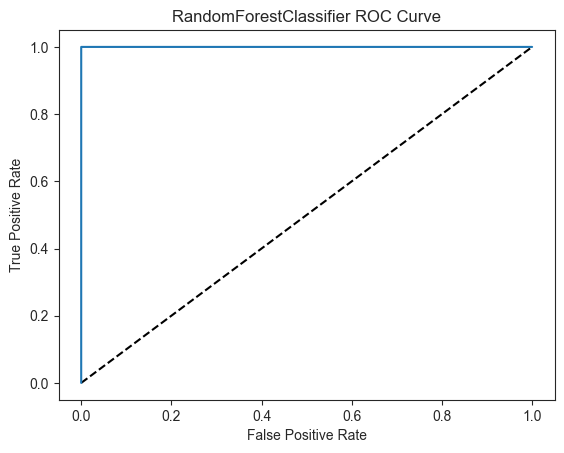

In [58]:
from sklearn.preprocessing import LabelBinarizer

# Convert 'yes'/'no' to 1/0 if y_train is categorical
lb = LabelBinarizer()
y_train_binary = lb.fit_transform(y_train).ravel()  # Flatten the array

# Calculate ROC curve
y_pred_prob = rf_best_fit.predict_proba(X_train)[:, 1]
t_fpr, t_tpr, thresholds = roc_curve(y_train_binary, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(t_fpr, t_tpr, label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC Curve')
plt.show()

roc-auc curve and score: AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve
ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1
Specificity:- TN/ TN+FP ...sENSITIVITY OR RECALL: TP/TP+FN ...
PRECISION= TP/TP+FP ...FPR = 1-SPECIFICITY = FP/TP+FP

Sensitivity and Specificity are inversely proportional to each ot
TPR⬆️, FPR⬆️ and TPR⬇️, FPR⬇️

In [59]:
auc_score1 = roc_auc_score(y_train,y_pred_prob)
print(auc_score1)

0.9999999984660677


In [60]:
#Test set
y_pred_test = rf_best_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))
#since the f1 score is near to 1 we can say that in test set that is performing in best way
#precision is tp/tp+fp and recall is tp/tp+fn
#support is actual occurancce of datasets



              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11065
           1       0.94      0.97      0.95     10821

    accuracy                           0.95     21886
   macro avg       0.95      0.95      0.95     21886
weighted avg       0.95      0.95      0.95     21886



In [61]:
confusion_matrix(y_test, y_pred_test)

array([[10405,   660],
       [  369, 10452]], dtype=int64)

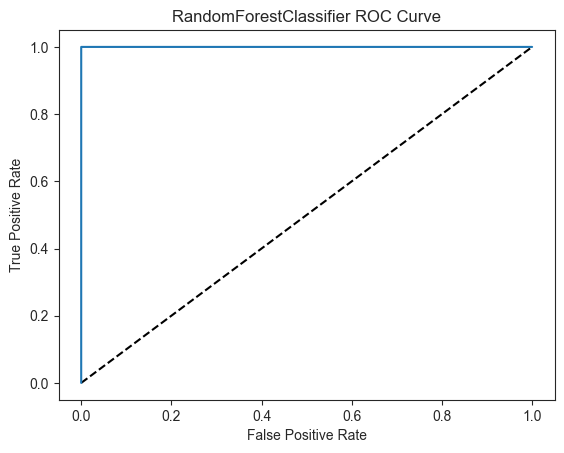

In [63]:
lb = LabelBinarizer()
y_train_binary = lb.fit_transform(y_train).ravel()  # Flatten the array

# Calculate ROC curve
y_pred_prob = rf_best_fit.predict_proba(X_train)[:, 1]
t_fpr, t_tpr, thresholds = roc_curve(y_train_binary, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(t_fpr, t_tpr, label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC Curve')
plt.show()

In [64]:
#Saving the model in a file
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf_best_fit, open(filename, 'wb'))

In [65]:
#Load the model
def loadModel():
    loaded_model = pickle.load(open(filename, 'rb'))
    return loaded_model

In [66]:
#Predict the model
def predictModel(model, X):
    y_pred = model.predict(X)
    return y_pred